In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = sns.load_dataset('iris')

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
from sklearn import tree
from sklearn.model_selection import train_test_split

In [7]:
X = df.iloc[:,:-1]
y= df.iloc[:,-1]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [10]:
model = tree.DecisionTreeClassifier()

In [12]:
model.fit(X_train,y_train)

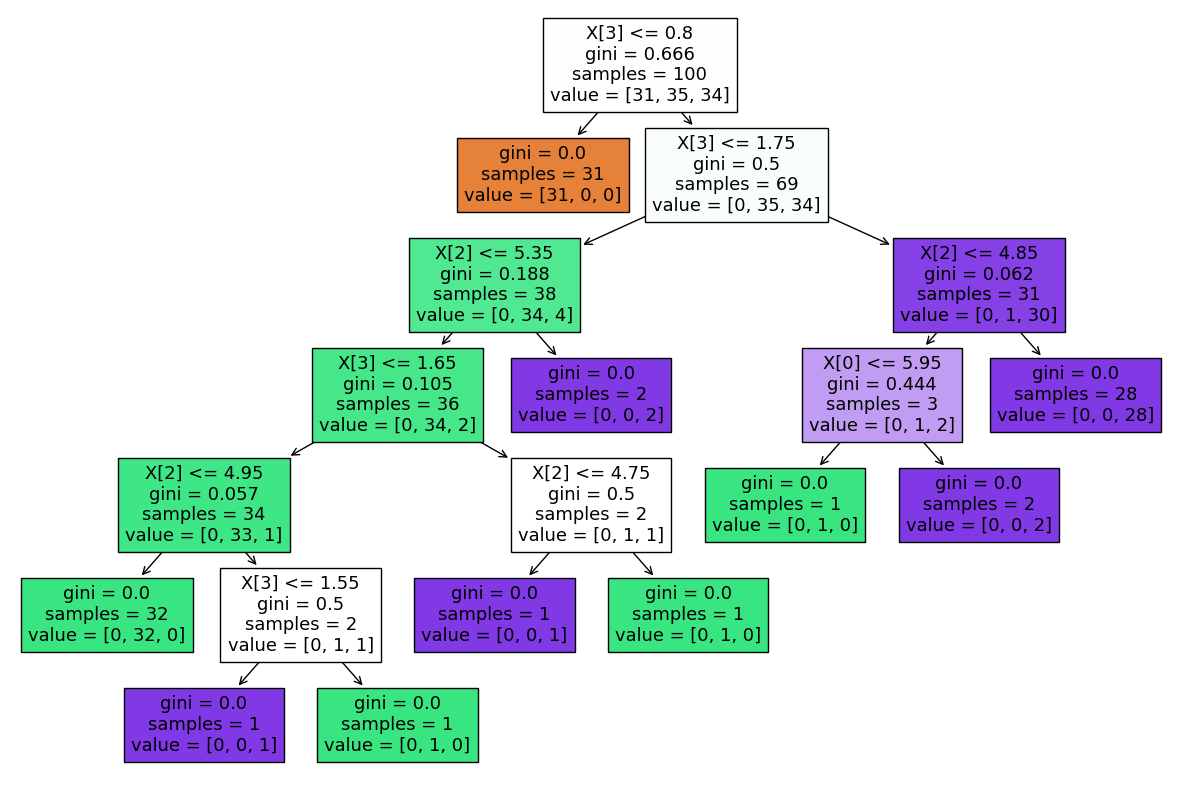

In [15]:
plt.figure(figsize=(15,10))
tree.plot_tree(model,filled=True)
plt.show()

In [16]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [18]:
model.score(X_test,y_test)

1.0

In [19]:
model.score(X_train,y_train)

1.0

# Now doing post pruning

In [21]:
pmodel = tree.DecisionTreeClassifier(max_depth=2)

In [22]:
pmodel.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

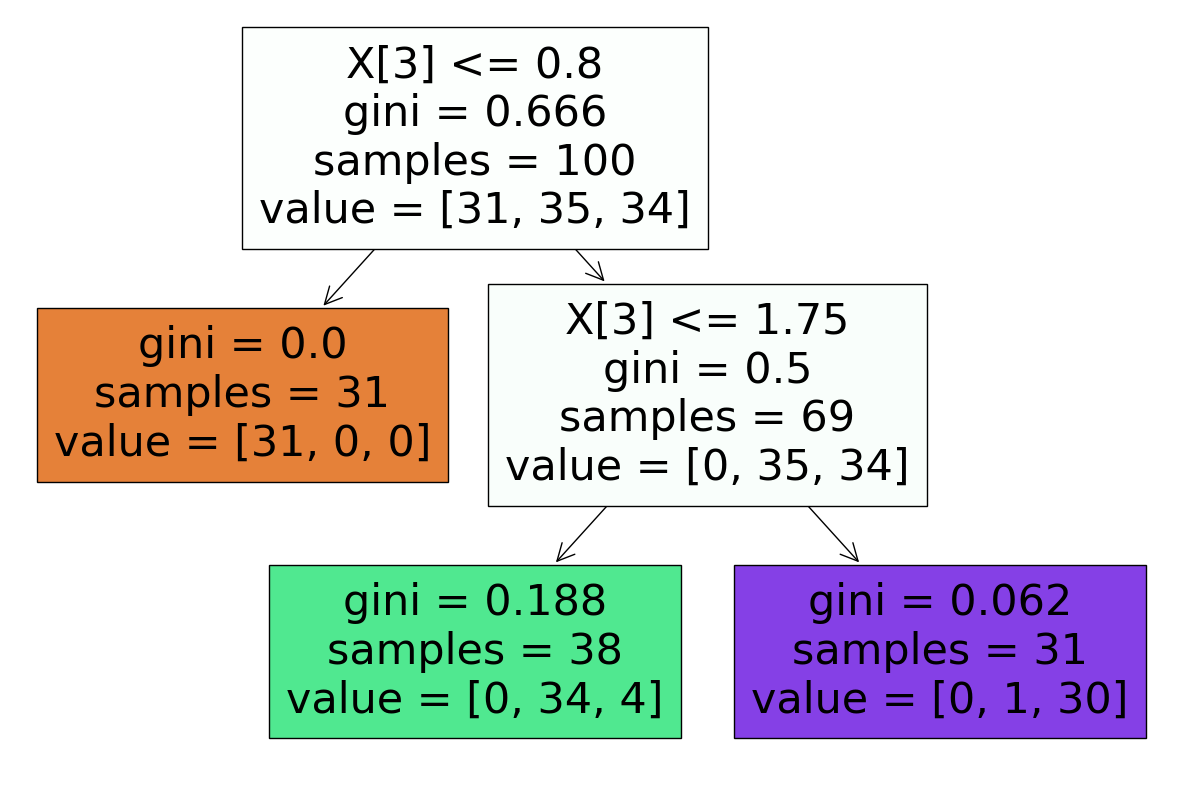

In [23]:
plt.figure(figsize=(15,10))
tree.plot_tree(pmodel,filled=True)
plt.show()

In [25]:
pmodel.score(X_test,y_test)

0.98

In [26]:
from sklearn.metrics import accuracy_score,classification_report

In [32]:
y_pred = pmodel.predict(X_test)
accuracy = accuracy_score(y_test,y_pred,normalize=False)

In [33]:
accuracy

49

In [31]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.94      1.00      0.97        15
   virginica       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



# Pre_prunning

In [43]:
params = {
          'criterion':['gini','entropy','log_loss'],
          'splitter':['best','random'],
          'max_depth':[1,2,3,4,5],
          'max_features':['auto', 'sqrt', 'log2']
         }

In [44]:
from sklearn.model_selection import GridSearchCV
premodel = tree.DecisionTreeClassifier()
cv=GridSearchCV(premodel,param_grid=params,cv=5,scoring='accuracy')

In [45]:
cv.fit(X_train,y_train)

D:\Nprashant\nenv\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
150 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Nprashant\nenv\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Nprashant\nenv\lib\site-packages\sklearn\tree\_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "D:\Nprashant\nenv\lib\site-packages\sklearn\tree\_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'log_loss'

  warnings.warn(some_fits_failed_message, FitF

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [46]:
cv.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'sqrt',
 'splitter': 'random'}

In [47]:
y_pred = cv.predict(X_test)

In [48]:
y_pred

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa', 'setosa', 'setosa',
       'versicolor', 'setosa', 'setosa', 'virginica', 'versicolor',
       'setosa', 'setosa', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'virginica'], dtype=object)

In [49]:
accuracy_score(y_pred,y_test)

0.98

In [50]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.94      0.97        16
   virginica       0.94      1.00      0.97        15

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50

